## Miniproject II, Guess the year !

1.Import the Required Libraries

In [1]:
import pandas as pd
import torch as t
import torch.nn as nn
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


### 2.Using pandas, load the .csv file.

In [2]:
!wget https://raw.githubusercontent.com/sebinemeth/ftdl-data/main/YearPredictionMSD.csv -O YearPredictionMSD.csv

--2022-04-25 15:58:35--  https://raw.githubusercontent.com/sebinemeth/ftdl-data/main/YearPredictionMSD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53937968 (51M) [text/plain]
Saving to: ‘YearPredictionMSD.csv’

YearPredictionMSD.c 100%[===================>]  51.44M   207MB/s    in 0.2s    

2022-04-25 15:58:36 (207 MB/s) - ‘YearPredictionMSD.csv’ saved [53937968/53937968]



In [3]:
data = pd.read_csv('YearPredictionMSD.csv') #, nrows=50000
data.head()


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
data.shape[1]

91

### 3.Verify whether any qualitative data is present in the dataset.

In [5]:
#Verifying qualitaitve data
cols = data.columns
num_cols = data._get_numeric_data().columns
categorical=list(set(cols) - set(num_cols))
print(categorical)

[]


In [6]:
# Checking the columns having categorical values
cols 
#num_cols

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90'],
      dtype='object')

### 4.Check for missing values. 

In [7]:
## No missing values found
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
86    0
87    0
88    0
89    0
90    0
Length: 91, dtype: int64

### 5.Check for outliers.

In [8]:
#code to check the outliers in the data
outliers={}
for i in range(data.shape[1]):
  t_min = (data.iloc[:,i].mean() - (3 * data.iloc[:,i].std()))
  t_max = (data.iloc[:,i].mean() + (3 * data.iloc[:,i].std()))
  count=0
  for j in data.iloc[:,i]:
    if j < t_min or j > t_max:
      count=count+1
  percentage = count/data.shape[0]
  outliers[data.columns[i]]= "%.3f" % percentage
outliers

{'0': '0.019',
 '1': '0.010',
 '10': '0.005',
 '11': '0.010',
 '12': '0.010',
 '13': '0.015',
 '14': '0.017',
 '15': '0.016',
 '16': '0.016',
 '17': '0.014',
 '18': '0.016',
 '19': '0.013',
 '2': '0.011',
 '20': '0.016',
 '21': '0.015',
 '22': '0.013',
 '23': '0.015',
 '24': '0.013',
 '25': '0.018',
 '26': '0.017',
 '27': '0.017',
 '28': '0.018',
 '29': '0.017',
 '3': '0.011',
 '30': '0.016',
 '31': '0.015',
 '32': '0.017',
 '33': '0.016',
 '34': '0.015',
 '35': '0.016',
 '36': '0.017',
 '37': '0.017',
 '38': '0.016',
 '39': '0.015',
 '4': '0.015',
 '40': '0.017',
 '41': '0.017',
 '42': '0.015',
 '43': '0.014',
 '44': '0.016',
 '45': '0.015',
 '46': '0.017',
 '47': '0.017',
 '48': '0.017',
 '49': '0.015',
 '5': '0.008',
 '50': '0.016',
 '51': '0.015',
 '52': '0.015',
 '53': '0.015',
 '54': '0.016',
 '55': '0.018',
 '56': '0.017',
 '57': '0.016',
 '58': '0.013',
 '59': '0.016',
 '6': '0.010',
 '60': '0.016',
 '61': '0.015',
 '62': '0.016',
 '63': '0.017',
 '64': '0.017',
 '65': '0.016',

In [9]:
#data.iloc[0]#.mean()

6.Separate features from target data

In [10]:
X=data.iloc[:,1:] # features
Y=data.iloc[:,:1] # Target data

In [11]:
# checking the features
#X.shape
X.iloc[:,0].min() #-284.90836
#X.min()

4.4185

### 7.Data Rescaling using Standardization Methodology

In [12]:
X = (X - X.min()) / (X.max() - X.min())
X.head()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
0,0.860844,0.520015,0.638629,0.468319,0.279845,0.267357,0.497138,0.325330,0.617330,0.340078,...,0.432239,0.569115,0.327585,0.493224,0.512380,0.659509,0.528092,0.499917,0.542475,0.459884
1,0.837937,0.514852,0.633315,0.483503,0.298094,0.202651,0.616818,0.410166,0.670349,0.414250,...,0.424980,0.577781,0.321123,0.502724,0.484122,0.656912,0.528448,0.529855,0.551845,0.495266
2,0.880010,0.537641,0.605290,0.485205,0.307745,0.237314,0.574141,0.399441,0.657280,0.380663,...,0.422381,0.589197,0.300206,0.491692,0.509335,0.678347,0.496790,0.503723,0.549798,0.455684
3,0.828773,0.480350,0.567581,0.446035,0.327202,0.195050,0.603655,0.339514,0.596574,0.299154,...,0.453535,0.539840,0.308665,0.471793,0.477423,0.689537,0.504114,0.525228,0.567246,0.483691
4,0.880257,0.555214,0.627082,0.467304,0.283848,0.246879,0.541533,0.346750,0.640634,0.375840,...,0.429187,0.568728,0.329063,0.481793,0.505700,0.663939,0.525252,0.520872,0.551543,0.497890


### 8.Splitting the Dataset into Train validation and test

In [13]:
#Splitting the data into Train, validation and test set
train_end = int(len(X) * 0.8)
dev_end = int(len(X) * 0.9)
X_shuffle = X.sample(frac=1, random_state=0)
Y_shuffle = Y.sample(frac=1, random_state=0)
x_train = X_shuffle.iloc[:train_end,:]
y_train = Y_shuffle.iloc[:train_end]
x_dev = X_shuffle.iloc[train_end:dev_end,:]
y_dev = Y_shuffle.iloc[train_end:dev_end]
x_test = X_shuffle.iloc[dev_end:,:]
y_test = Y_shuffle.iloc[dev_end:]
print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

(40000, 90) (40000, 1)
(5000, 90) (5000, 1)
(5000, 90) (5000, 1)


### Part 2: Create and Train the model

### 1.Import relevant modules

In [14]:
#All the necessary modules are imported in the begining

### 2.Convert the DataFrames into tensors. 

In [15]:
x_train = t.tensor(x_train.values).float()
y_train = t.tensor(y_train.values).float()
x_dev = t.tensor(x_dev.values).float()
y_dev = t.tensor(y_dev.values).float()
x_test = t.tensor(x_test.values).float()
y_test = t.tensor(y_test.values).float()

### 3.Define the architecture of the network. 

In [16]:
model = nn.Sequential(
nn.Linear(x_train.shape[1], 75), \
nn.ReLU(), \
nn.Linear(75, 50), \
nn.ReLU(), \
nn.Linear(50, 5), \
#nn.ReLU(), \
nn.Linear(5, 1))


In [17]:
#if t.cuda.is_available():
#   model = model.cuda()

### 4.Define loss and optimizer

In [18]:
loss_function = t.nn.MSELoss() #

In [19]:
optimizer = t.optim.Adam(model.parameters(), lr=0.01)
#criterion = nn.CrossEntropyLoss()


### 5.train the network

In [ ]:
EPOCHS=3000
training_loss=[]
for i in range(EPOCHS):
  train_loss = 0.0
  
  # Forward pass
  y_pred = model(x_train).squeeze()
  #Calculating the loss
  loss = loss_function(y_pred, y_train)
  #clear the gradients
  optimizer.zero_grad()
  #calculate gradients
  loss.backward()
  #Update weights
  optimizer.step()
  # Calculate total loss
  train_loss += loss.item()
  if i%100 == 0:
    print(i, loss.item())
    ls=train_loss / x_train.shape[0]
    training_loss.append(ls)
    print(f'Epoch {i} \t\t Training Loss: {ls}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([40000, 1])) that is different to the input size (torch.Size([40000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 3993120.25
Epoch 0 		 Training Loss: 99.82800625
100 1455.679443359375
Epoch 100 		 Training Loss: 0.036391986083984376
200 771.2747802734375
Epoch 200 		 Training Loss: 0.019281869506835938
300 668.6901245117188
Epoch 300 		 Training Loss: 0.016717253112792967
400 582.7373046875
Epoch 400 		 Training Loss: 0.0145684326171875
500 517.9025268554688
Epoch 500 		 Training Loss: 0.01294756317138672
600 472.5047607421875
Epoch 600 		 Training Loss: 0.011812619018554687
700 442.1209411621094
Epoch 700 		 Training Loss: 0.011053023529052734
800 421.936279296875
Epoch 800 		 Training Loss: 0.010548406982421875
900 407.96685791015625
Epoch 900 		 Training Loss: 0.010199171447753907
1000 397.4447937011719
Epoch 1000 		 Training Loss: 0.009936119842529297
1100 388.69708251953125
Epoch 1100 		 Training Loss: 0.009717427062988282
1200 380.83306884765625
Epoch 1200 		 Training Loss: 0.009520826721191407
1300 373.44189453125
Epoch 1300 		 Training Loss: 0.00933604736328125
1400 366.36029052734375
E

Plotting Loss graph

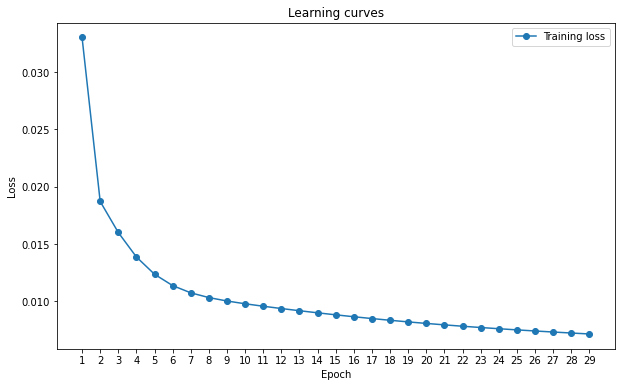

In [45]:
epochs = range(1, len(training_loss[1:]) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss[1:], '-o', label='Training loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.show()

### 6.Test using the first register in the test dataset

In [ ]:
x_test.shape

In [ ]:
for i in range(x_test.shape[1]):
  pred = model(x_test[0])
print("Ground truth:", y_test[0].item(), "Prediction:",pred.item()) 

**Part 3: Implementation of validation and Test using the validation and test data**

1. Implementation of validation step after each training epoch

In [21]:
epochs = 3000
min_valid_loss = np.inf # Initaizing minimum valid loss to infinity
valid_losses=[]
training_loss=[]
for e in range(epochs):
    
    train_loss = 0.0  #Initalizing train loss to zero
    model.train()     # Using the model in training Mode
    
    # Forward pass
    y_pred = model(x_train).squeeze()
    # Loss calculations
    loss = loss_function(y_pred, y_train)
    ##clear the gradients   
    optimizer.zero_grad()
    # Calculating gradients 
    loss.backward()
    # Updating weights
    optimizer.step()
    # calculating total weights
    train_loss += loss.item()
    
    valid_loss = 0.0 #Initalizing validation loss to zero
    model.eval() # Using the model in Evaluation mode
    # Forward pass
    y_pred_val = model(x_dev).squeeze()
    # Loss calculations
    loss = loss_function(y_pred_val, y_dev)
    valid_loss = loss.item() #* x_dev.size(0)
    if e%100 == 0:
      training_loss.append(train_loss / x_train.shape[0])
      valid_losses.append(valid_loss / x_dev.shape[0])
      print(f'Epoch {e+1} \t\t Training Loss: {train_loss / x_train.shape[0]} \t\t Validation Loss: {valid_loss / x_dev.shape[0]}')
      if min_valid_loss > valid_loss:
          print(f'Validation Loss Decreased({min_valid_loss:.4f}--->{valid_loss:.4f}) \t Saving The Model')
          min_valid_loss = valid_loss
          # Saving State Dict
          t.save(model.state_dict(), 'saved_model.pth')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([40000, 1])) that is different to the input size (torch.Size([40000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([5000, 1])) that is different to the input size (torch.Size([5000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 		 Training Loss: 99.81245 		 Validation Loss: 798.08805
Validation Loss Decreased(inf--->3990440.2500) 	 Saving The Model
Epoch 101 		 Training Loss: 0.033028924560546874 		 Validation Loss: 0.245104931640625
Validation Loss Decreased(3990440.2500--->1225.5247) 	 Saving The Model
Epoch 201 		 Training Loss: 0.018719369506835937 		 Validation Loss: 0.14730045166015626
Validation Loss Decreased(1225.5247--->736.5023) 	 Saving The Model
Epoch 301 		 Training Loss: 0.01601043701171875 		 Validation Loss: 0.1259259033203125
Validation Loss Decreased(736.5023--->629.6295) 	 Saving The Model
Epoch 401 		 Training Loss: 0.013873983764648438 		 Validation Loss: 0.10914803466796875
Validation Loss Decreased(629.6295--->545.7402) 	 Saving The Model
Epoch 501 		 Training Loss: 0.012366661834716797 		 Validation Loss: 0.09735626831054688
Validation Loss Decreased(545.7402--->486.7813) 	 Saving The Model
Epoch 601 		 Training Loss: 0.011377442169189454 		 Validation Loss: 0.0896495056152343

Plotting loss graph

In [43]:
print('Min. Training loss:',training_loss[np.argmin(training_loss)])
print('Min. Validation loss:',valid_losses[np.argmin(valid_losses)])

Min. Training loss: 0.007155416107177734
Min. Validation loss: 0.057031744384765624


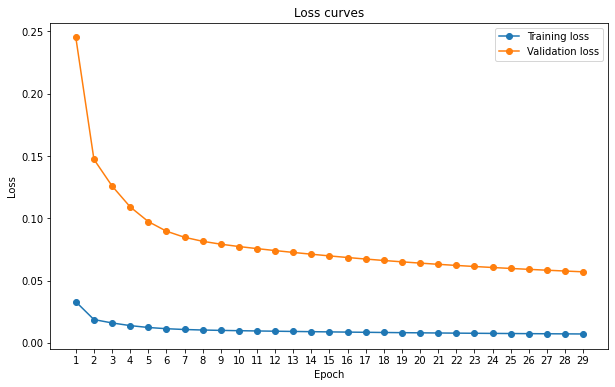

In [30]:
epochs = range(1, len(training_loss[1:]) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss[1:], '-o', label='Training loss')
plt.plot(epochs, valid_losses[1:], '-o', label='Validation loss')
plt.legend()
plt.title('Loss curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.show()

2. Testing model using more than a single sample from test data set

In [32]:
for i in range(20):
  pred = model(x_test[i])
  print("Ground truth:", y_test[i].item(), "Prediction:",round(pred.item()))

Ground truth: 2005.0 Prediction: 2010
Ground truth: 2005.0 Prediction: 1999
Ground truth: 2000.0 Prediction: 2012
Ground truth: 1971.0 Prediction: 1997
Ground truth: 2007.0 Prediction: 1985
Ground truth: 1996.0 Prediction: 1996
Ground truth: 2004.0 Prediction: 2013
Ground truth: 2000.0 Prediction: 1994
Ground truth: 2004.0 Prediction: 1999
Ground truth: 2009.0 Prediction: 1996
Ground truth: 2008.0 Prediction: 1984
Ground truth: 1997.0 Prediction: 1990
Ground truth: 2006.0 Prediction: 2006
Ground truth: 2004.0 Prediction: 2005
Ground truth: 2007.0 Prediction: 2000
Ground truth: 2009.0 Prediction: 2011
Ground truth: 2000.0 Prediction: 1979
Ground truth: 1999.0 Prediction: 2002
Ground truth: 2003.0 Prediction: 2001
Ground truth: 2008.0 Prediction: 2000
